In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [7]:
def get_code_df(code):
    df = pd.read_csv('%s.csv'%code).set_index('date')
    return df    

In [8]:
def add_return_df(code_df):
    code_df['Return'] = np.log(code_df['close']/code_df['close'].shift(1))
    return code_df

In [35]:
def plot_vol_return(code,code_df):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,8))
    plt.subplot(311)
    plt.title('%s close'%code)
    plt.plot(code_df['close'][::15])
    plt.xticks(rotation=30)
    plt.legend('close')
    plt.subplot(312)
    plt.plot(code_df['Return'][::15])
    plt.xticks(rotation=30)
    plt.legend('Return')
    plt.subplot(313)
    plt.bar(code_df.index[::15],code_df['vol'][::15])
    plt.xticks(rotation=30)
    plt.legend('volume')
    plt.show()

In [36]:
def corr_vol_turnover(code,code_df):
    """correlation coefficient between turnover and volume"""
    val =   code_df[['vol','turnover']].corr().values[0][1]
    print('%s correlation coefficient between turnover and volume is %.2f '%(code,val)) 

NDX correlation coefficient between turnover and volume is 0.28 


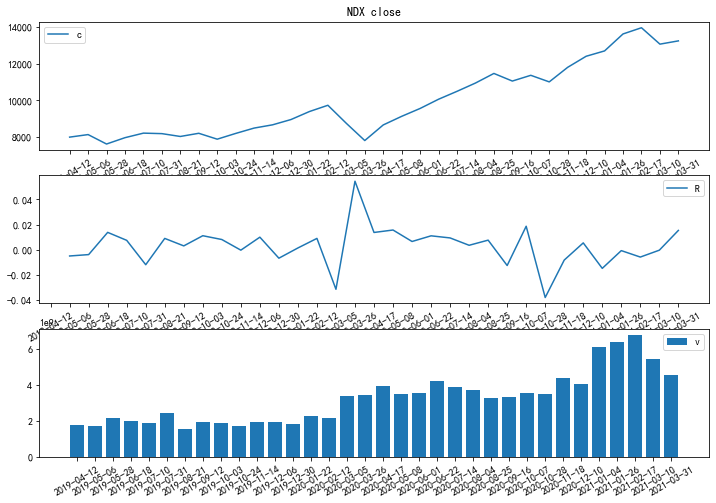

In [37]:
code  = 'NDX'
NDX_df = get_code_df(code)
NDX = add_return_df(NDX_df)
corr_vol_turnover(code,NDX)
plot_vol_return(code,NDX)

AMZN correlation coefficient between turnover and volume is 0.78 


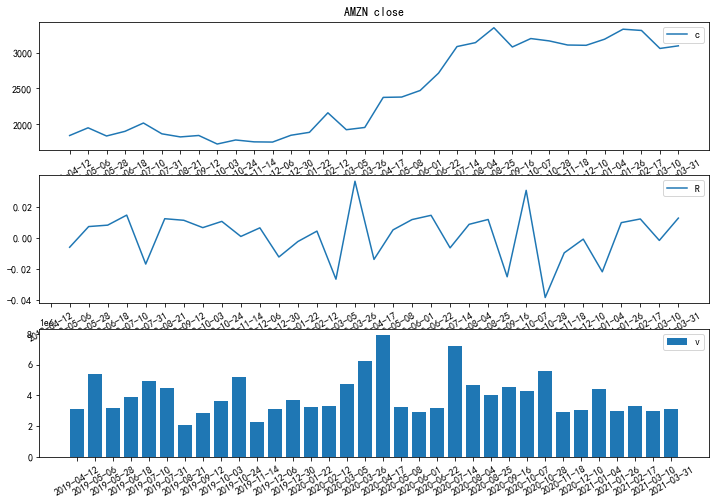

In [38]:
code = 'AMZN'
AMZN_df = get_code_df(code)
AMZN = add_return_df(AMZN_df)
corr_vol_turnover(code,AMZN)
plot_vol_return(code,AMZN)


AAPL correlation coefficient between turnover and volume is 0.55 


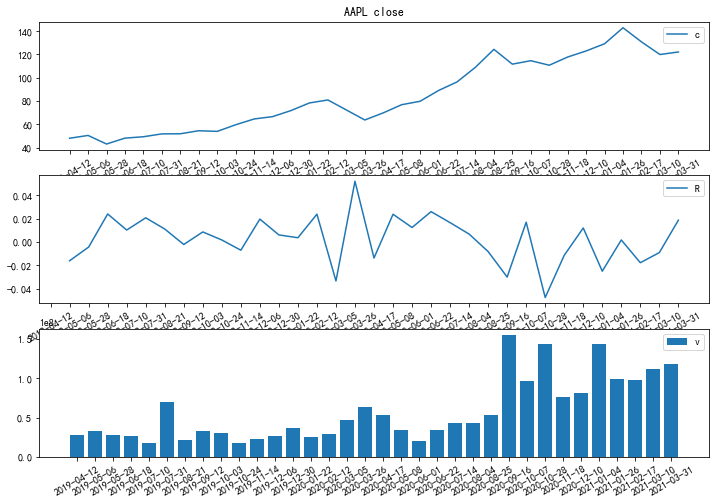

In [44]:
code = 'AAPL'
AAPL_df = get_code_df(code)
AAPL = add_return_df(AAPL_df)
corr_vol_turnover(code,AAPL)
plot_vol_return(code,AAPL)


In [40]:
df = pd.DataFrame([NDX['close'],AMZN['close'],AAPL['close']]).T
df.columns =  ['NDX','AMZN','AAPL']
df

,NDX,AMZN,AAPL
date,,,
2019-04-12,7984.16,1843.06,48.13
2019-04-15,7976.01,1844.87,48.22
2019-04-16,8000.23,1863.04,48.22
2019-04-17,7996.08,1864.82,49.19
2019-04-18,7998.06,1861.69,49.38
...,...,...,...
2021-04-08,13829.31,3299.30,130.36
2021-04-09,13900.19,3372.20,133.00
2021-04-12,13850.00,3379.39,131.24


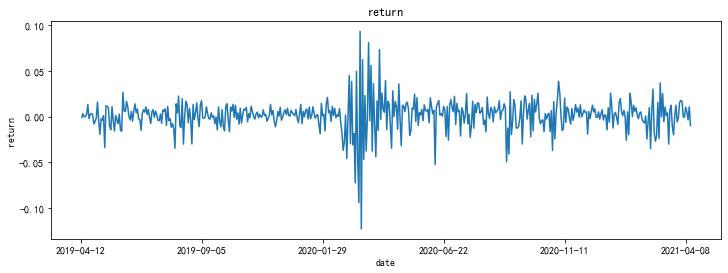

In [41]:
NDX["close"].pct_change().plot(figsize=(12,4))
plt.xlabel('date')
plt.ylabel('return')
plt.title('return')
plt.show()

In [42]:
df = pd.DataFrame()
df['NDX'] = NDX["close"].pct_change()
df['AMZN'] = AMZN["close"].pct_change()
df['AAPL'] = AAPL["close"].pct_change()

d:\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


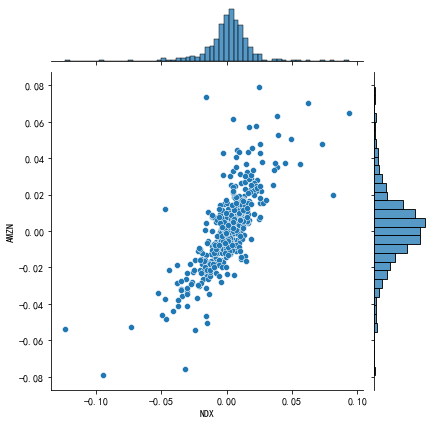

In [17]:
sns.jointplot('NDX','AMZN',data=df)

d:\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


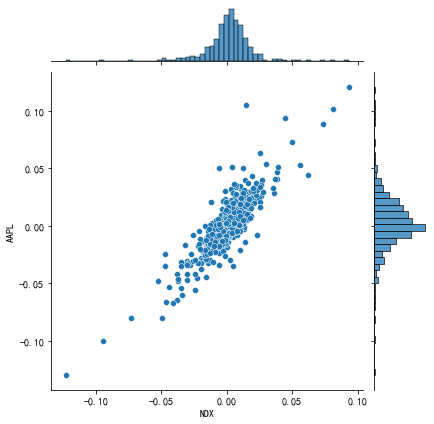

In [18]:
sns.jointplot('NDX','AAPL',data=df)

In [19]:
df

,NDX,AMZN,AAPL
date,,,
2019-04-12,NaN,NaN,NaN
2019-04-15,-0.001021,0.000982,0.001870
2019-04-16,0.003037,0.009849,0.000000
2019-04-17,-0.000519,0.000955,0.020116
2019-04-18,0.000248,-0.001678,0.003863
...,...,...,...
2021-04-08,0.010262,0.006071,0.019234
2021-04-09,0.005125,0.022096,0.020252
2021-04-12,-0.003611,0.002132,-0.013233


In [20]:
def return_risk():
    rets = df.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

In [21]:
def plot_return_risk():
    ret,vol=return_risk()
    color=np.array([ 0.18, 0.96, 0.75])
    plt.scatter(ret, vol, marker = 'o', 
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("Average daily return%")     
    plt.ylabel("std%")
    for label,x,y in zip(df.columns,ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))

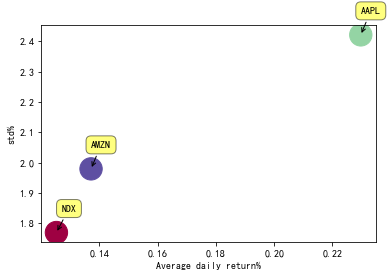

In [22]:
 plot_return_risk()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### data clean

In [24]:
def clean_data_df(df):
   
    df.loc[:,'1d_close_future_pct'] = df['close'].shift(-1).pct_change(1)
    df.loc[:,'current1day'] = df['close'].pct_change(1)
    df.dropna(inplace=True)
    
    df.loc[df['1d_close_future_pct'] > 0, 'future1daytrend'] = 1
    df.loc[df['1d_close_future_pct'] <= 0, 'future1daytrend'] = 0
    df = df[['current1day', 'future1daytrend']]
    return df

### x&y

In [25]:
def split_train_and_test(df):
    y = df['future1daytrend'].values
    X = df.drop('future1daytrend', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    return X_train, X_test, y_train, y_test

## 1、LR

In [26]:
def logisticRegression(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train, y_train)
    new_prediction = logreg.predict(X_test)
    return (logreg.score(X_test, y_test))

## 2、svm

In [27]:
def svm_svc(X_train, X_test, y_train, y_test):
    clf = svm.SVC(gamma='auto')
    clf.fit(X_train, y_train)
    new_prediction = clf.predict(X_test)
    return (clf.score(X_test, y_test))

In [28]:
def main(code):
    df = get_code_df(code)
    df = clean_data_df(df)
    X_train, X_test, y_train, y_test = split_train_and_test(df)
    logisticRegression_score = logisticRegression(X_train, X_test, y_train, y_test)
    print('logisticRegression_score',logisticRegression_score)
    svm_score = svm_svc(X_train, X_test, y_train, y_test)
    print('svm_score',svm_score)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
SVM = svm.SVR(kernel='linear')

In [31]:
LR = LinearRegression()

In [32]:
def make_predict(code,clf,clf_name):
    df = get_code_df(code)
    for i in range(1, 21, 1):
        df['close - ' + str(i) + 'd'] = df['close'].shift(i)
    df_20d = df[[x for x in df.columns if 'close' in x]].iloc[20:]
    df_20d = df_20d.iloc[:,::-1]  
    size = int(len(df_20d)*0.7)
    features_train = df_20d[:size]
    labels_train = df_20d['close'].shift(-1)[:size]  
    features_test = df_20d[size:]
    labels_test = df_20d['close'].shift(-1)[size:]
    clf.fit(features_train, labels_train)   
    origin = df_20d['close'].to_frame('close')
    predict_df = origin.copy()
    for i in range(20*3):
        pred_index = pd.date_range(start =predict_df.last_valid_index(),periods=2,freq='B')[-1].strftime('%Y-%m-%d')
        predict_price = clf.predict([predict_df.tail(21)['close'].tolist()])
        predict_df.loc[pred_index,'close']=predict_price
    plt.figure(figsize =(15,8))
    plt.plot(predict_df['close'], label='predict data')
    plt.plot(origin['close'], label='true data',c='r')
    plt.xticks(range(0,len(predict_df.index.tolist()),50))
    plt.title('%s %s'%(code,clf_name))
    plt.legend()        
    plt.show()
    return 

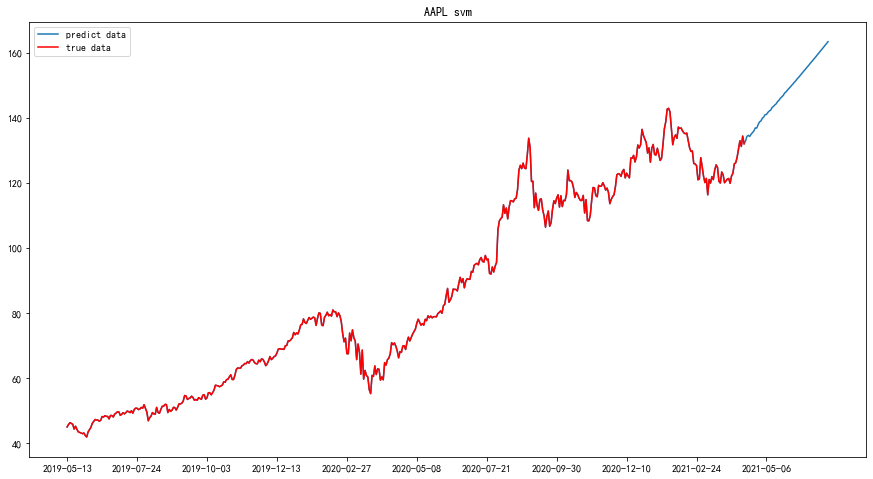

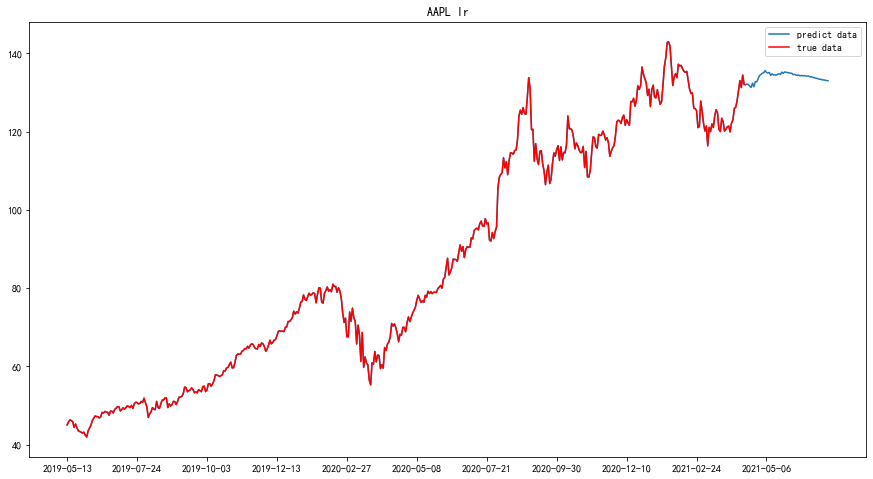

In [33]:
code = 'AAPL'
make_predict(code,SVM,'svm')
make_predict(code,LR,'lr')

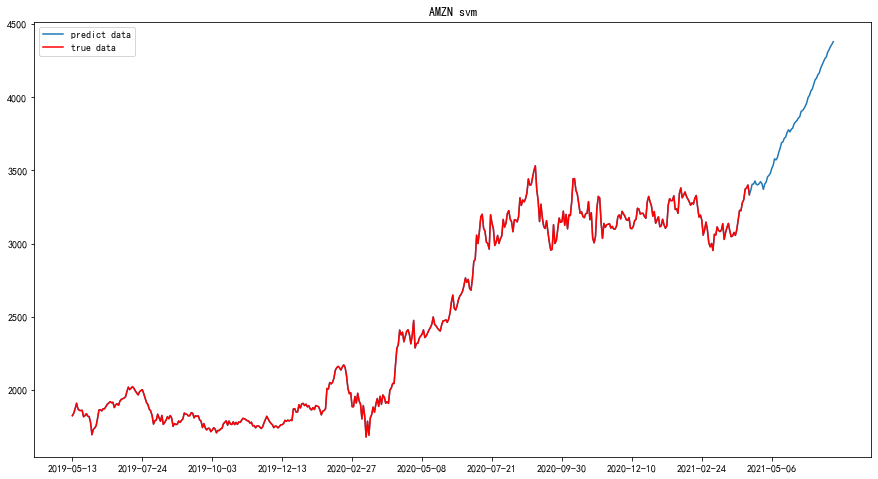

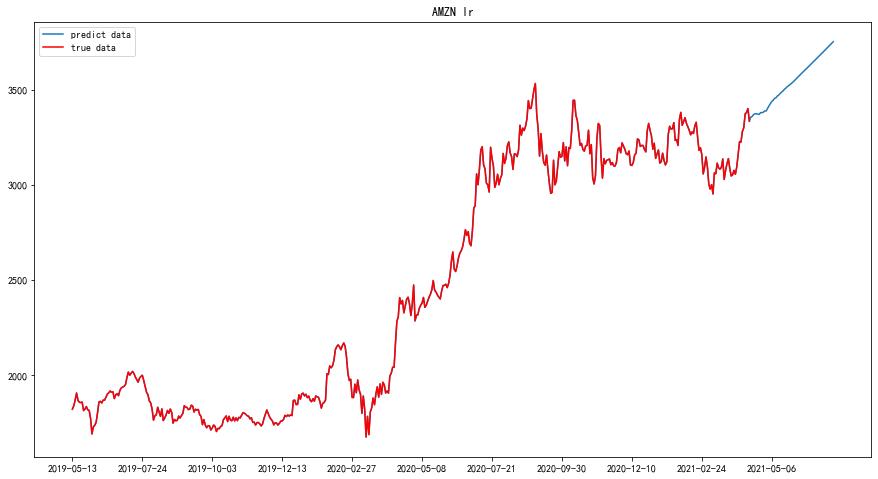

In [34]:
code = 'AMZN'
make_predict(code,SVM,'svm')
make_predict(code,LR,'lr')